In [1]:
import numpy as np 
import sys

    
import xarray as xr 
import matplotlib.pyplot as plt 
import matplotlib.dates as mdates 
import matplotlib as mpl
from scipy import signal #for filtering
print("Modules imported")

import pandas as pd
import datetime as datetime

Modules imported


In [2]:
import re 
file="/expanse/lustre/scratch/jisrael/temp_project/run_schism/run_13/station.in"
station_id =[]
with open(file) as f:
    f.readline()
    for station in range(int(f.readline())):
        line = f.readline()
        if '!' in line:
            station_id.append(line.split('!')[-1])
        else:
            station_id.append(None)
# print(station_id)

print(len(station_id))

stations = []
for sublist in station_id:
    match = re.search(r'"(.*?)"', sublist)
    if match:
        stations.append(match.group(1).strip())
    else :
        stations.append(sublist.replace("\n", "").strip())
print(len(set(stations)))


for i, station in enumerate(stations):
    print("%d == %s" % (i,station))

306
277
0 == San Joaquin at Antioch
1 == Mokelumne River at Benson's Ferry
2 == Cache Slough
3 == Cache Creek at Yolo
4 == Old River at Coney Island
5 == Clifton Court
6 == Discovery Bay at Indian Slough
7 == Doughty Cut above Grant Line Canal
8 == Sacramento River at Emmaton
9 == Sacramento River at Emmaton
10 == emm upper Emmaton
11 == emm lower Emmaton
12 == Farrar Park
13 == Grant Line Canal at Tracy Rd Bridge
14 == Green's Landing
15 == Harvey O Banks PP
16 == Holland Tract
17 == Harvey O Banks PP
18 == CCWD Old River near Discovery Bay
19 == CCWD Rock Slough PP
20 == Italian Slough Headwater near Byron
21 == Jersey Point
22 == Sacramento River at Mallard Island
23 == Sacramento River at Mallard Island
24 == Middle River at Howard Rd Bridge
25 == San Joaquin at Mossdale Bridge
26 == Middle River at Tracy Blvd
27 == Old River Barrier near DMC (Above)
28 == Old River below Dam
29 == Old River at Bacon Island
30 == Old River at Head
31 == Old River at Byron
32 == Prisoners Point
33 =

In [14]:
len(stations)

306

In [16]:
columns = ['time']
stations_no = [str(i) for i in range(len(stations))]
columns = columns + stations_no



# These outputs are invoked with iout_sta=1, and are found in outputs/staout_[1..,9], corresponding respectively to elev, air pressure, wind u, wind v, T, S, u, v, w. Each output has a simple ASCII format:
# Time(sec), variable @ station 1,2,…. (specified in station.in)

#file="//global/scratch/users/jennaisrael/run_schism/run_8/outputs_barotropic/staout_1"
file13="/expanse/lustre/scratch/jisrael/temp_project/run_schism/run_13/outputs/staout_6"# 1:elev,2:air pressure,3:wind_x,4:wind_y,5:temp,6:salt,7:u,8:v,9:w
file14="/expanse/lustre/scratch/jisrael/temp_project/run_schism/run_14/outputs/staout_6"
s13 = pd.read_csv(file13, sep='\s+', names=columns,dtype=np.float32) #, decode_times=False)
#s13 = s13.apply(pd.to_numeric)

s14 = pd.read_csv(file14, sep='\s+', names=columns,dtype=np.float32) #, decode_times=False)
#s14 = s14.apply(pd.to_numeric)

#s13.time
# # Add in the number of seconds elapsed @ our chosen timestep
timedelta13 = [pd.Timedelta(i, unit = 's') for i in s13.time]
timestamp13 = [pd.to_datetime("09-10-2020 00:00:00") + i for i in timedelta13]

s13["time"] = timestamp13
s14["time"] = timestamp13


In [19]:
# pd.read_csv(file13,sep='\s+',names=columns,dtype=np.float32)

In [17]:
# s13

In [ ]:
# pd.read_csv(file13, sep='\s+', names=columns)

In [ ]:
# timedelta13 = [pd.Timedelta(i, unit = 's') for i in s13.time*0.1]

Axes(0.125,0.11;0.775x0.77)


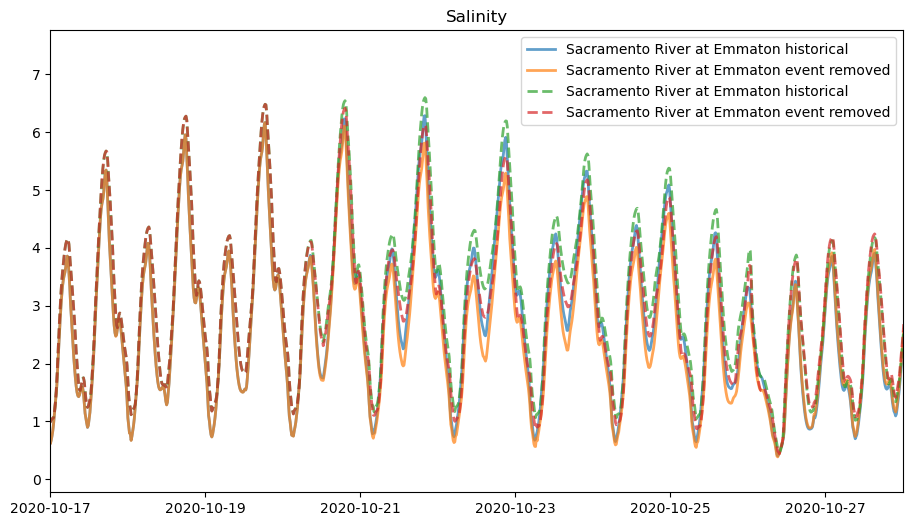

In [20]:
# Make a plot
plt.ioff()

#station_indices=[0, 208, 2, 62, 105]
#station_indices=[47,48,56,7,8,9] #first are 2 martinez, then Old River near Clifton court intake, last 3 are emmaton
station_indices=[8,9]#47,48,56,7,8,9,]
fig = plt.figure(figsize=(11,6))
ax = plt.gca()
# ax.grid(alpha=0.5)
for idx in station_indices:
    if idx==9:
        ls='--'
    else:
        ls='-'
    values13 = s13[str(idx)]
    ax.plot(s13.time, values13, label = stations[idx]+ " historical", linewidth=2, linestyle=ls, alpha =0.7)
    values14 = s14[str(idx)]
    ax.plot(s14.time, values14, label = stations[idx]+ " event removed", linewidth=2, linestyle=ls,alpha=0.7)
    

leg = ax.legend()
print(ax)
#ax.set_xlim(s13.time.iloc[0], s13.time.iloc[-1])
ax.set_xlim(pd.to_datetime("2020-10-17"),pd.to_datetime("2020-10-28"))
# ax.grid(which='major', color='b', linestyle='-')
ax.set_title("Salinity")
plt.show()
# ax.grid()

